# Perceptron Tutorial

The perceptron algorithm is a supervised algorithm for binary classification. This linear classifier was introduced by Frank Rosenblatt in 1957 in his paper, 'The Perceptron--a perceiving and recognizing automaton.' The perceptron makes it predictions based on a linear combination of it's weights with the feature vector. It also allows for online learning, which means that it can process each element in a training set one at a time. 

The perceptron is trained with the 'perceptron learning rule' which is defined as follows:

1. Initialize the weight vector (Wo), either to 0 or small random numbers. 
2. Calculate the initial 'guess' as a linear combination of that weight vector and the first input.
3. Compare the perceptron output to the target output (error). Since this is a binary classification algorithm out outputs and targets will either be values of 0 or 1 which are used as the class codes.
4. Update the weight vector (Wn) depending on how the target compares to the perceptron output. If the target is less than the output than the weights will be decreased and if the target is greater than the output the weights will be increased. 
5. Steps 1-4 are repeated until every output matches the target value for each training example.

Here we are going to code up a perceptron and train it with the perceptron learning rule using a hard limit as the activation function. I am using numpy here because it is readible and optimized for linear algebra operations. I am defining the perceptron rule as:

```
Wn = Wo + alpha * error * input.T
error = true - predicted
```

The complete code for the perceptron is below.

In [316]:
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def hardlim(a):
    if a > 0.0:
        return 1.
    else:
        return 0.

class Perceptron(object):
    '''
    simple feed forward perceptron with a hard limit activation
    trained with the perceptron learning rule
    '''
    def __init__(self):
        self.alpha = None
        self.w = None

    def response(self, X):
        '''
        perceptron response
        :param X: input vector
        :return: perceptron out
        '''
        a = hardlim(np.dot(self.w.T, X))
        return a

    def updateWeight(self, X, error):
        '''
        update the vector of input weights
        :param X: input data
        :param error: prediction != true
        :return: updated weight vector
        '''
        self.w += self.alpha * error * X

    def train(self, X, y, alpha, iterations):
        '''
        trains perceptron on vector data by looping each row and updating the weight vector
        :param X: input data
        :param y: correct y value
        :return: updated parameters
        '''
        # initialize the learning rate and count data size
        self.alpha = alpha
        num_examples, num_features = np.shape(X)

        # set up bias
        bias = np.ones(shape=(num_examples,1))
        X = np.hstack((X, bias))

        # initialize weight vector
        self.w = np.random.rand(num_features + 1)
        
        error_count = []
        for i in range(iterations):
            for j in range(num_examples):
                prediction = self.response(X[j])
                error = int(y[j]) - prediction 
                self.updateWeight(X[j], error)
                error_count.append(error)
                
        error_count = np.array(error_count)
        plt.plot(error_count)
        plt.ylim([-1,1])
        plt.show()

The perceptron is contained in a python class. Within the class there are functions to create the output, update the weights based on the error and a function to contain the training loop. 

* **Response** - This simply calcualtes the linear combination of the weights and input vectors. Then pushes that output through the hard limit function which will generate either a 0 or 1 for the class prediction. 
* **updateWeight** - This function will take the error term and update the perceptron weights as defined by the perceptron learning rule.
* **train** - The train function first initializes some of the parameters of the perceptron. It will take an 'alpha' which should be any number between 0 and 1. Then it will determine the proper size of the weight vector by setting it to the corresponding size of the input vectors. Finally before training it will initialize that weight vector to small random numbers and tack on a bias. During training the loop will run for a predetermined number of iterations. On each iteration the perceptron will; generate it's prediciton, compare that prediction to the target (error), then update the weights as necessary based on the error term.

At the end of training the perceptron will generate a plot which shows the error generate from each training example. When the plot flatlines at 0 it may be safe to assume that the perceptron converged to a good solution.

Now we will come up with some data for the perceptron to solve. From [Neural Network Design](http://hagan.okstate.edu/NNDesign.pdf) page 4-7. Let's plot the points below.

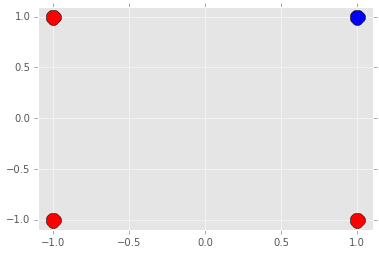

In [309]:
# generate training data
X = np.array([[-1,-1],
              [-1,1],
              [1,-1],
              [1,1]])

y = np.array([[0],
              [0],
              [0],
              [1]])

# plot the points
plt.plot(X[0][0],X[0][1], 'ro', markersize=15)
plt.plot(X[1][0],X[1][1], 'ro', markersize=15)
plt.plot(X[2][0],X[2][1], 'ro', markersize=15)
plt.plot(X[3][0],X[3][1], 'bo', markersize=15)
plt.axis([-1.1,1.1,-1.1,1.1])
plt.show()

So we are trying to draw a decision boundary to seperate the blue from the red circles. 

Lets train the network and see how it does. 

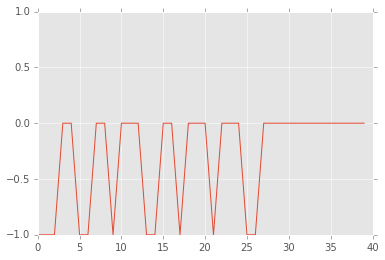

In [321]:
model = Perceptron()
model.train(X, y, alpha=0.1, iterations=10)    

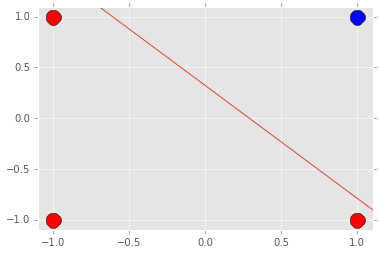

In [320]:
n = np.linalg.norm(model.w[0:2])
ww = (model.w[0:2]) / n
ww1 = [float(ww[1])* 2., -1.0*float(ww[0])* 2.] 
ww2 = [-1.0*float(ww[1]) * 2., float(ww[0]) * 2.]
plt.plot([ww1[0]-model.w[2],ww2[0]-model.w[2]], [ww1[1]-model.w[2],ww2[1]-model.w[2]])
plt.plot(X[0][0],X[0][1], 'ro', markersize=15)
plt.plot(X[1][0],X[1][1], 'ro', markersize=15)
plt.plot(X[2][0],X[2][1], 'ro', markersize=15)
plt.plot(X[3][0],X[3][1], 'bo', markersize=15)
plt.axis([-1.1,1.1,-1.1,1.1])
plt.show()





Here is a cool animation of the how the decision boundary updates after every full iteration of the training data. 

![](http://i.imgur.com/aEufKbg.gif)